In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"c:\Users\asus\OneDrive\Desktop\heart_disease_proj\heart.csv")


# Task 2: Model Building & Evaluation

## Data Preprocessing

I checked if there are any Nan values and where are they located. Then, I filled the cells containing the Nan values with the mode value(The most frequent value) 

In [2]:
number_of_Nan = df.isna().sum()
# print(number_of_Nan)
mode_Thal = df["Thal"].mode()[0]
df["Thal"]= df["Thal"].fillna(mode_Thal)

# for i in df["Thal"]:
#     print(i)

I checked for any duplicated rows and I found none

In [3]:
number_of_dups = df.duplicated().sum()
# print(number_of_dups)

I checked for the number of outliers and decided whether to keep these outliers or not. 

The number of outliers is 0
The number of outliers is 7
The number of outliers is 4
The number of outliers is 0
The number of outliers is 3
The number of outliers is 0
The number of outliers is 20


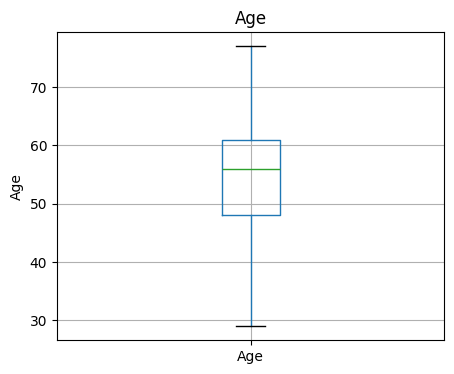

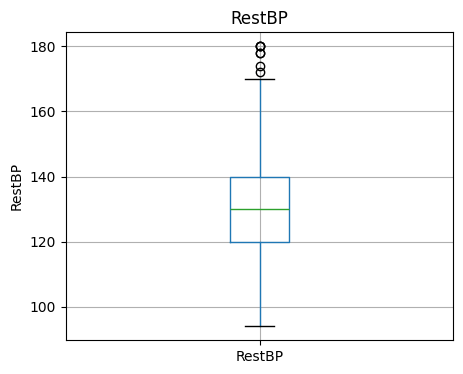

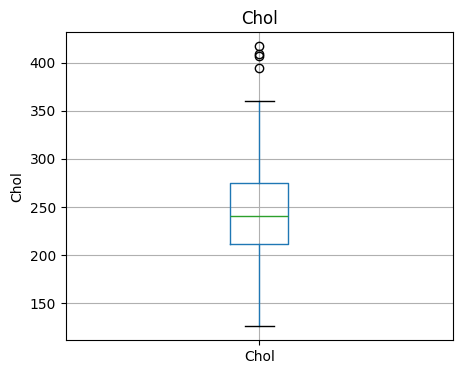

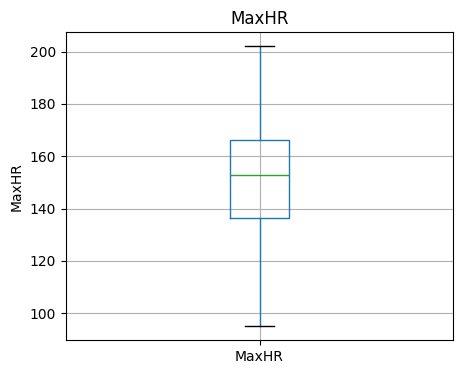

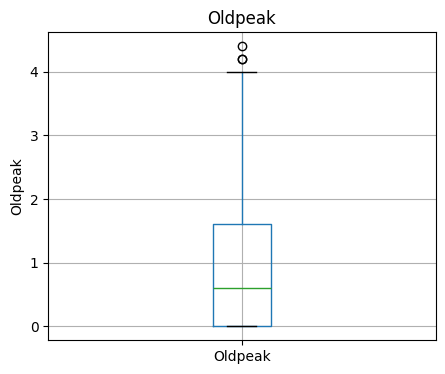

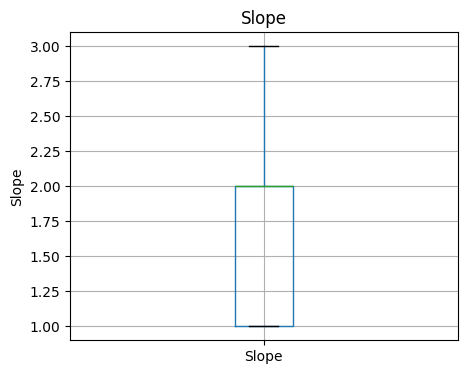

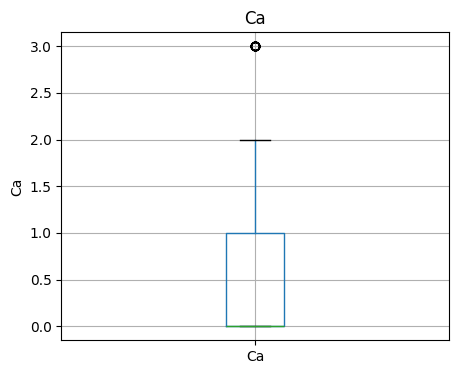

In [4]:
columns = ["Age", "RestBP" , "Chol", "MaxHR", "Oldpeak" , "Slope", "Ca"]

for col in columns:
    plt.figure(figsize = (5,4))
    df.boxplot(column= col)
    plt.title(f"{col}")
    plt.ylabel(col)
  

    # The code below is the new method that I used to identify the outliers after doing a research.
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    counter = 0
    for value in df[col]:
        
        if value > upper_limit or value < lower_limit:
            # print(value)
            counter +=1
        else: 
            pass
    print(f"The number of outliers is {counter}")

    df = df[df["RestBP"] < 190]
    df = df[df["Chol"] < 420]
    df = df[df["MaxHR"] >90]
    df = df[df["Oldpeak"] < 4.5]



        

### Handling Categorical Data 

Strategy A: Label Encoding

Strategy B: One-Hot Encoding

In [5]:
df_encoded = pd.get_dummies(df)





## Preparing for Training

###  The Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split
y = df_encoded["Target"]
x  = df_encoded.drop("Target" , axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42, stratify = y ) 



### Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)




## Model Training and Evaluation

### Logistic Regression

ROC Score: 0.9242424242424243
Accuracy Score: 0.8305084745762712
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.79      0.85      0.81        26

    accuracy                           0.83        59
   macro avg       0.83      0.83      0.83        59
weighted avg       0.83      0.83      0.83        59



c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


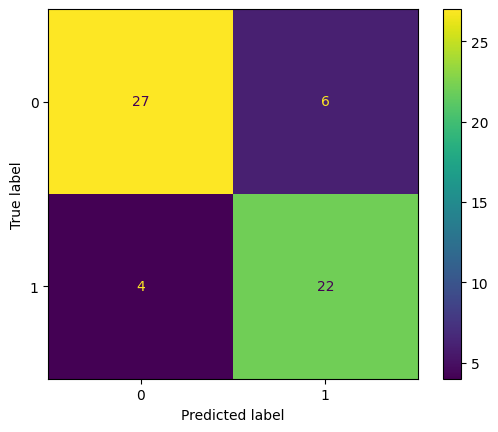

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , ConfusionMatrixDisplay, confusion_matrix, roc_auc_score

lg_model = LogisticRegression()

lg_model.fit(x_train,y_train)
y_predict1 = lg_model.predict(x_test_scaled)
y_proba1 = lg_model.predict_proba(x_test_scaled)

accuracy1 = accuracy_score(y_test , y_predict1)
cp1 = classification_report(y_test, y_predict1)
y_proba_positive1 = y_proba1[:,1]
roc_score1 = roc_auc_score(y_test, y_proba_positive1)


cm1 = confusion_matrix(y_test, y_predict1) 
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot()

print(f"ROC Score: {roc_score1}")
print(f"Accuracy Score: {accuracy1}")
print(cp1)


### Decision Tree

ROC Score: 0.729020979020979
Accuracy Score: 0.7288135593220338
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        33
           1       0.68      0.73      0.70        26

    accuracy                           0.73        59
   macro avg       0.73      0.73      0.73        59
weighted avg       0.73      0.73      0.73        59



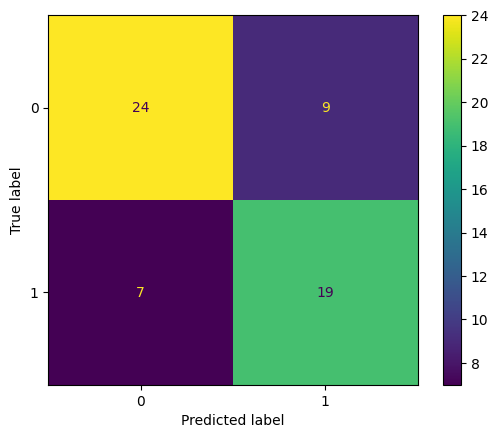

In [9]:
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(x_train_scaled,y_train)

y_predict2 = dt_model.predict(x_test_scaled)
y_proba2 = dt_model.predict_proba(x_test_scaled)

accuracy2 = accuracy_score(y_test , y_predict2)
cp2 = classification_report(y_test, y_predict2)
y_proba_positive2 = y_proba2[:,1]
roc_score2 = roc_auc_score(y_test, y_proba_positive2)


cm2 = confusion_matrix(y_test, y_predict2) 
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()

print(f"ROC Score: {roc_score2}")
print(f"Accuracy Score: {accuracy2}")
print(cp2)

### Support Vector Machine (SVM)

ROC Score: 0.9009324009324009
Accuracy Score: 0.864406779661017
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.85      0.85      0.85        26

    accuracy                           0.86        59
   macro avg       0.86      0.86      0.86        59
weighted avg       0.86      0.86      0.86        59



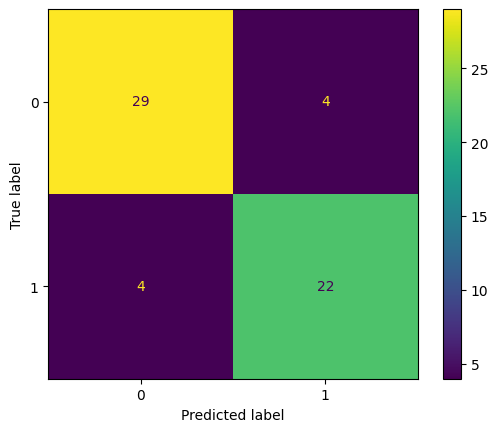

In [10]:
from sklearn.svm import SVC

svm_model = SVC(kernel = "rbf", random_state=42, probability=True)

svm_model.fit(x_train_scaled,y_train)

y_predict3 = svm_model.predict(x_test_scaled)
y_proba3 = svm_model.predict_proba(x_test_scaled)

accuracy3 = accuracy_score(y_test , y_predict3)
cp3 = classification_report(y_test, y_predict3)
y_proba_positive3 = y_proba3[:,1]
roc_score3 = roc_auc_score(y_test, y_proba_positive3)


cm3 = confusion_matrix(y_test, y_predict3) 
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp3.plot()

print(f"ROC Score: {roc_score3}")
print(f"Accuracy Score: {accuracy3}")
print(cp3)

### Random Forest Classifier

ROC Score: 0.9230769230769231
Accuracy Score: 0.847457627118644
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.84      0.81      0.82        26

    accuracy                           0.85        59
   macro avg       0.85      0.84      0.84        59
weighted avg       0.85      0.85      0.85        59



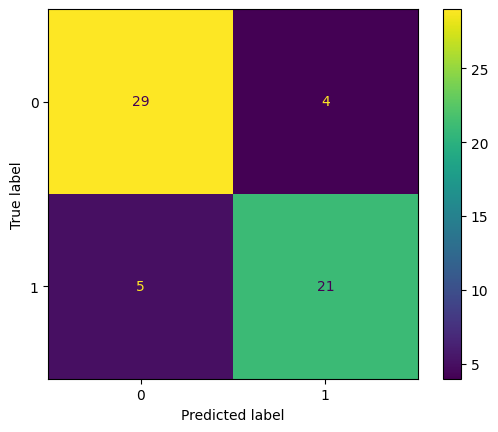

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state= 65,n_estimators=100)

rf_model.fit(x_train_scaled,y_train)

y_predict4 = rf_model.predict(x_test_scaled)
y_proba4 = rf_model.predict_proba(x_test_scaled)

accuracy4 = accuracy_score(y_test , y_predict4)
cp4 = classification_report(y_test, y_predict4)
y_proba_positive4 = y_proba4[:,1]
roc_score4 = roc_auc_score(y_test, y_proba_positive4)


cm4 = confusion_matrix(y_test, y_predict4) 
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp4.plot()

print(f"ROC Score: {roc_score4}")
print(f"Accuracy Score: {accuracy4}")
print(cp4)